In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import uniform_filter1d

In [2]:
def convert_float(value):
    # Convert bytes to string if necessary
    if isinstance(value, bytes):
        value = value.decode('utf-8')
    return float(value.replace(',', '.'))

def load_data_from_file(filename):
    # Define converters for each column to handle commas as decimal separators
    converters = {0: convert_float, 1: convert_float}
    
    # Load the data from the file using the converters and specifying the tab delimiter
    data = np.loadtxt(filename, delimiter='\t', converters=converters)
    
    # Extract each column from the data
    x = data[:, 0]
    y = data[:, 1]
    
    return x, y

x, y = load_data_from_file("H:/Escritorio/Python/Datos1.txt")

In [3]:
# Suavizado (opcional)
y_suavizado = uniform_filter1d(y, size=60)

In [4]:
# Encontrar máximos con criterios adicionales
indices_maximos, propiedades = find_peaks(y_suavizado, prominence=0.01, distance=1)

In [5]:
# Detectar mínimos locales en los datos suavizados
indices_minimos, _ = find_peaks(-y_suavizado, prominence=0.0025, distance=1)

In [6]:
# Extraer los valores correspondientes de x e y (suavizado)
x_maximos = x[indices_maximos]
y_maximos = y[indices_maximos]
x_minimos = x[indices_minimos]
y_minimos = y[indices_minimos]

In [7]:
# Mostrar resultados
print("Máximos encontrados:")
for i in indices_maximos:
    print(f"x = {x[i]:.2f}, y = {y_suavizado[i]:.2f}")

Máximos encontrados:
x = 3.29, y = 0.09
x = 42.78, y = 0.31
x = 47.42, y = 0.35
x = 51.62, y = 0.39
x = 56.53, y = 0.42


In [8]:
print("\nMínimos encontrados:")
for i, (x_val, y_val) in enumerate(zip(x_minimos, y_minimos)):
    print(f"x = {x_val:.2f}, y = {y_val:.2f}")


Mínimos encontrados:
x = 1.70, y = 0.09
x = 3.85, y = 0.09
x = 6.03, y = 0.07
x = 10.25, y = 0.10
x = 12.86, y = 0.10
x = 33.89, y = 0.28
x = 34.18, y = 0.24
x = 40.02, y = 0.27
x = 44.51, y = 0.31
x = 48.93, y = 0.33
x = 53.65, y = 0.35
x = 58.26, y = 0.37


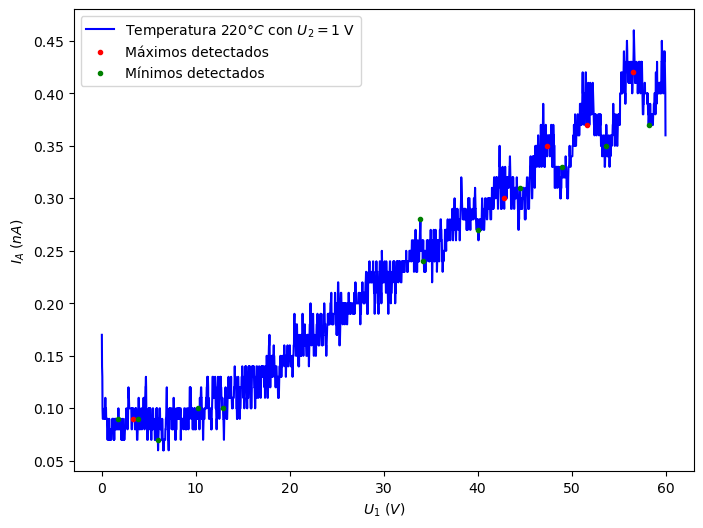

In [9]:
plt.figure(figsize=(8, 6))

plt.plot(x, y, color='blue',label=r'Temperatura 220$\degree C$ con $U_2= 1$ V')
plt.plot(x_maximos, y_maximos, "ro", label="Máximos detectados", markersize=3)
plt.plot(x_minimos, y_minimos, "go", label="Mínimos detectados", markersize=3)  # Mínimos en azul

plt.ylabel(r'$I_A$ $(nA)$')
plt.xlabel(r'$U_1$ $(V)$')


plt.legend()

plt.savefig("H:/Escritorio/UGR/Año 3/Física cuántica/Prácticas/Frank-Hertz/Fotos/T220V1")  #Guardar plot en ruta
plt.show()